# Init

In [1]:
import panphon
import panphon.distance
ft = panphon.FeatureTable()
dst = panphon.distance.Distance()

## Options:

In [2]:
allowComplex = True # Default = True
allowDiacritics = False # Default = False
verbose = False # Default = False
exportFiles = True # Default = True
exportLangs = False # Default = False
includeAllophones = True # Default = False
minFrequency = 1 # Default = 1

focusPhone = '' #Default = ''
#allowSomeDiacritics = True # Not Implemented

# Get Data from Phoible.csv

In [3]:
# Simplify
import csv
import json
import panphon
from functools import reduce
import unicodedata
import re
from ipapy import UNICODE_TO_IPA
from ipapy import is_valid_ipa


def concat(x1, x2): return x1 + x2


s = " "
ft = panphon.FeatureTable()

# Source: 'https://raw.githubusercontent.com/phoible/dev/master/data/phoible.csv'
with open('data/phoible.csv', mode='r', encoding='utf-8') as infile:
    reader = csv.reader(infile)
    results = {}
    frequency = {}
    SaneFrequency = {}
    worldPhoneList = []
    index = []
    IPAErrors = []
    glyphList = {}
    for row in reader:
        if row[0] == "InventoryID":
            continue
        else:
            glyphs = []
            if not includeAllophones:
                glyphs = row[6].split("|")
            else:
                #set set glyphs equal to the value of row[7], but split it at both spaces and literal pipes
                if row[7] != "None" and row[7] != "NA":
                    glyphs = re.split(r'[\s|]+', row[7])
                else:
                    glyphs = row[6].split("|")


            for glyph in glyphs:
                if len(glyph) > 0:
                    found_group = None
                    for key in glyphList:
                        if key == glyph:
                            found_group = key
                            break
                        else:
                            found_group = glyph
                            break
                    if found_group in glyphList:
                        glyphList[found_group] += 1
                    else:
                        glyphList[found_group] = 1


    #for key, frequency in glyphList.items():
    #    print(f"Phone: '{key}'.  Frequency: {frequency}")
    array_of_strings = []
    for key, frequency in glyphList.items():
        if frequency >= minFrequency and key != None :
            array_of_strings.append(key)
    if minFrequency > 1:
        print('Filtered entries in less than ' + str(minFrequency) + ' languages')

    print(len(array_of_strings))
            



4097


## Menu of Sets: Pick one

In [4]:
#Full Phoible Phonemes:
#array_of_strings = ['h','j','k','kʰ','kˀ','l','m','n','p','pʰ','pˀ','s','sˀ','t','tʰ','tˀ','t̠ʃ','t̠ʃʰ','t̠ʃˀ','w','ŋ','ʔ','a','aː','e','eː','i','iː','o','oː','u','uː','y','æ','æː','ø','ɤ','ɤː','ɯ','ɯː','b','d','dʲ','k̟','lʲ','lˠ','nʲ','q','sʲ','tʲ','ʝ','ɔ','ɔː','ɨ','ɨː','ɵ̞','ɵ̞ː','ʊ','kʷʰ', 'kʷʼ','kʼ','k͈','k͈ʷ','pʼ','p͈','qʰ','qʷʰ','qʷʼ','qʼ','q͈','q͈ʷ','r','s͈','tsʰ','tsʷʰ','tsʷʼ','tsʼ','tʼ','t̠ʃʷʰ','t̠ʃʷʼ','t̠ʃʼ','t̠͈ʃ','t̠͈ʃʷ','t͈','t͈s','t͈sʷ','x','xʷ','x͈','x͈ʷ','z','ħ','ɡ','ɢ','ɢʷ','ʃ','ʃʷ','ʃ͈','ʃ͈ʷ','ʒ','χ','χʷ','χ͈','χ͈ʷ','e̞ˤ','æˤ','ø̞ˤ','d̻','d̻z̻','f','fʼ','k̟ʲʰ','k̟ʲʼ','n̻','qχ','qχʷ','qχʷʼ','qχʼ','s̻','t̻s̻','t̻s̻ʼ','t̻ʰ','t̻ʼ','v','x̟ʲ','z̻','ç̟','ɡʷ','ɡ̟ʲ','ɣ̟ʲ','ɦ','ɬʲ','ɬʲʼ','ɮʲ','ʁ','ʁʷ','ʃʼ','ʔʷ','ʕ','ʝ̟','a̟ː','e̞ː','o̞ː','ɜ','ts','β','a̟','e̞','o̞','ə̆','ɪ','d̠ʒ','ɖ','ɖʐ','ʂ','ʈ','ʈʂ','ʈʂʰ','ʈʰ','ʐ͇','˥˦','˧','˩˨','ãː','ũː','b̤','d̠ʒː','d̠ʒ̤','d̪','d̪ː','d̪̤','jː','kː','lː','n̪','pː','rː','r̠','s̪','s̪ː','t̠ʃː','t̪','t̪ʰ','t̪ː','wː','ɖː','ɖ̤','ɡ̤','ɳ','ʈː','ã','ẽ̞','ẽ̞ː','ĩ','ĩː','õ̞','õ̞ː','ũ','ə','əː','bː','dz','dzː','dː','d̤','mː','nː','tsː','tː','ɡː','ɭ','ɭː','ɾ','β̞','β̞ː','ɑ','ɒː','ɛ','ɛː','ɪː','ʊː','ɽ','ŋː','ˀb','ˀd','ˀd̠ʒ','ˀɖ','ˀɡ','ɲ','õ','ɛ̃','ɪ̯','ʊ̯','l̥','mb','m̥','nd','n̠d̠ʒ','n̥','r̥','ŋɡ','ŋ̥','ɲ̥','ʍ','ˀl','ˀm','ˀn','ˀr','ˀw','ˀŋ','ˀɲ','a̰','ḛ','ḭ','o̰','ṵ','ɔ̰','ɛ̰','ɓ','ɗ','ʋ','a̟̙ː','ei̙','e̘ː','ou̙','o̘ː','ɒ','ɔ̘ː','əɨ̙','ə̘ː','ɛ̘ː','ɪ̈','c','ɣ','˦˥','˦˥̰','˨˩','˨˩̤','˩̰','ɐ','ɯ̞','ʌ','ʌ̯','cç','cçʰ','w˞','ç','ɥ','ɰ','ʐ','˥','˧˥','˧˨˥','a˞','a̟˞','u˞','ɑ̃˞','ə˞','ə̃˞','ɤ˞','b̤̥','d̤̥','m̩','tz̤̥','z̞̩','ŋ̩','ɡ̤̥','ɻ','˥˧˥','˦','æ̃','ə̟','k̟ʰ','ŋɡ̟','˧˩','˩','kʷ','˧˩̰','cʰ','j̥','n̩','ɟ','˧˨ˤ','˨˧','l̪','i̥','u̥','sʰ','ð','θ','˥̰','eĩ','oũ','ɪ̃','ʊ̃','˧˦','˧˨','ɘ','mˀ','nˀ','ŋˀ','ɾˀ','ʉ','ɹ','˧˨̤','kʲʰ','ŋʲ','ŋʷ','ŋ̥ʲ','ɬ','˨˧˩','ă','ẵ','ĕ','ie','iẽ','ĭ','ŏ̃','uo','ŭ','ŭ̃','ɔ̃','ɛ̆','ɛ̆̃','ɘː','˥˩','˩˥','mp','ndz','nt','nts','ŋk','ɖr̠','ɳɖr̠','ɳʈr̠̥','ʈr̠̥','ʀ','b͈','d̠͈ʒ','d͈','l̩','r̩','sː','ɲ̩','ʂ͇','d̪̤̥','l̤','bʷ','mʷ','m̥ʷ','ɸ','œ','ɡɣ','ɑː','l̻','t̻','c̟','ɲ̟','ɲ̟ʝ̟','ɳɖ','ʎ̟','ɺ','mbʷ','ŋɡʷ','ɸʷ','pʷ','ɶ̝','fː','qː','s̻ː','tːs','xː','ɬː','ɴ','ɴː','ʃː','χː','kx','kxʷ','tx','tɬ','tɬʰ','tɬʼ','t̪θ','t̪θʰ','t̪θʼ','ɣʷ','ɛ̃ː','ʈʂʼ','cʼ','hʷ','t̻s̻ʰ','ˀj','õː','dl','qʷ','ʔˤ','k͈ː','p͈ː','s͈ː','t̠͈ʃː','t͈ː','ʃ͈ː','hː','æ̃ː','ɔ̃ː','ə̃ː','sʼ','xʼ','ə̃','ɤ̞','ɤ̞ː','ɯ̃','ɯ̃ː','ɬʼ','ɸʼ','ɪ̃ː','ʊ̃ː','j̰','l̻̰','m̰','n̰','t̪ʼ','w̰','h̃','j̃','w̃','ɤ̞̃','k͉','p͉','t̠ʃ͉','t͉','t͉s','ɨ˞','s̻θ','t̠ːʃ','ɬ̻','kʰː','kʷʰː','kʷʼː','kʼː','pʼː','tsʰː','tsʼː','tʼː','t̠ʃʰː','t̠ʃʼː','xh','ʔː','ẽ','ɑ̃','ã̟','ã̟ː','ʰk','ʰkʷ','ʰp','ʰq','ʰt','ʰts','ou','oːu','y̆','øː','ɯ̆','ʈ͉','jˀ','wˀ','ɳɖʐ','˨','ndʲ','nz','n̠ʒ','çʲ','ɸʲ','ɺʲ','ʃʲ','ʎ','bˀ','dˀ','ɨ̃','ɺː','ʰt̠ʃ','mʲ','pʲ','t̠ʃʲʰ','˦˧','˦˩','ɐː','ɲː','kʲ','z̞̩ˠ','z̞̩̃ˠ','ɲɟ','ʌː','ʌ̃','ʌ̃ː','b͈ː','dˤ','d͈ː','f͈ː','kˤ','lˤ','l͈ː','m͈ː','n͈ː','rˤ','r͈ː','sˤ','tˤ','x͈ː','zˤ','z͈ː','ħ͈ː','ɡ͈ː','ɣ͈ː','ʒ͈ː','kʲʼ','ɡʲ','ʄ','ɜɪ̯','ɪ̈ː','ɪ̠','ɮ','ⱱ','ɢː','ᶑ','ᶑː','ʊ̈','ʊ̈ː','ɵ','zː','ʒː','sʼː','dˤː','sˤː','tˤː','zˤː','ðˤ','ħː','ʁː','ʕː','bʷː','bˤ','bˤː','fʷː','kʷː','lˤː','l̪ː','mʷː','mˤ','mˤː','rˤː','z̪','z̪ː','ħʷ','ɾˤ','f͉','s͉','ʃ͉','b̩','d̩','kp','v̩','z̩','ŋ̩ʷ','ɡb','ɡb̩','ɡ̩','ɡ̩ʷ','ɣ̩','ɟː','ŋm','iɛ','uɔ','cçʷʰ','çʷ','ɟʝ','ɟʝʷ','œː','d̠ʒʷ','t̠ʃʷ','bʲ','b̤ʲ','hʲ','pʲʰ','ɓ̥','ɗ̥','ɡ̤ʷ','ɾʲ','pf','pfʰ','ɠ','kǀ','kǁ','kǃ','kʟ͓̥ʼ','ŋmɡb','ˀd̪','o̯','ˀo̯','d̪ð','kxʰ','kǂ','bʷˠ','l̥ʲ','l̥ˠ','l̪ˠ','mʷˠ','nˠ','n̥ʲ','n̥ˠ','pʷˠʰ','ɡ̟','ɸʷˠ','ɸ̃','ɾˠ','ɾ̥ʲ','ɾ̥ˠ','βʲ','ẽː','e̯','ɑ̃ː','ə̯','ɤ̯','ɯ̞̯','yː','ø̞','ŋˑ','l̪̩','ɭ̩','ɹ̩','ø̞ː','ʉː','ʏ','œ̃','ɒ̃','ɱ','ɐ̃','ð͉','ɔ̯','ɛ̯','d̻ʲ','fʲ','n̻ʲ','rʲ','t̠ʃʲ','t̻ʲ','vʲ','zʲ','ʃˠ','ʒˠ','tsʲ','tʲʰ','ɤ̃','d̠ʒʲ','ʒʲ','ʁ̞','ie̞','ɨ̃ː','ɨ̆','d̻ː','l̻ː','n̻ː','pʰː','t̻ʰː','t̻ː','ʈʰː','b̤ː','d̠ʒ̤ː','d̪̤ː','m̤','n̪ː','n̪̤','t̪ʰː','ɖ̤ː','ɡ̤ː','ɽ̃','ʋː','æe̯','æẽ̯','ɔo̯','ɔõ̯','ɔ̤','ɜ̃','n̤','ɽ̤','ɾ̤','cçː','ɟʝː','ə̥','vː','ĕ̞','ŏ̞','ɒ̆','ɵ̞̆','p͉ʲ','t͉ʲ','z͇','ɔ̆','ioː','iæ','i̙ː','ɪ̙','ʊ̙','ʊ̙ː','çː','pfʼ','R̪|R','n̪|n','d̪z̪|dz','d̪|d','r̪|r','s̪|s','t̪s̪ʰ|tsʰ','t̪ʰ|tʰ','bⁿ','d̠ⁿ','d̪ⁿ','dⁿ','l̠','n̠','t̠','ɖⁿ','ɡⁿ','ai','au','bv','dɮ','cçʷ','ɲʷ','t̪|t','z̪|z','ɔi','l̪|l','ɬ̪|ɬ','n̪̥|n̥','t̪s̪|ts','n̠d̠','ɾ̪|ɾ','ɐˤ','ɔˤ','ɪˤ','ʊˤ','s̪ʷ|sʷ','t̪ʼ|tʼ','ᴅ','ɜi','r̪','ɹ̪|ɹ','d̪ʷ|dʷ','qχʷˤ','qχʷˤʼ','qχʼː','qχˤ','qχˤʼ','qχˤː','s̪ʷː|sʷː','s̪ː|sː','t̪s̪ʷʰ|tsʷʰ','t̪s̪ʷʼ|tsʷʼ','t̪s̪ʼ|tsʼ','t̪s̪ʼː|tsʼː','t̪ɬ̪ʰ|tɬʰ','t̪ɬ̪ʷʰ|tɬʷʰ','t̪ɬ̪ʷʼ|tɬʷʼ','t̪ɬ̪ʼ|tɬʼ','t̪ʷʰ|tʷʰ','t̪ː|tː','z̪ʷ|zʷ','ɬ̪ʷ|ɬʷ','ɬ̪ʷː|ɬʷː','ɬ̪ː|ɬː','ɮ̪|ɮ','ʁʷˤ','ʁˤ','ʃʷː','ʒʷ','χʷː','χʷˤ','χʷˤː','χˤ','χˤː','aˤ','iˤ','o̞ˤ','uˤ','ʈʂ͇','d̪ˤ','s̪ˤ','t̪ˤ','z̪ˤ','kxʼː','kxː','qχː','t̪s̪ː|tsː','t̪ɬ̪ʼː|tɬʼː','t̪ɬ̪ː|tɬː','ʕ̝','ɤ̟','d̪z̪','t̪s̪ʰ','t̪s̪ʼ','ɞ','ɯ͓','kpʰ','n̠t̠ʃ','n̪s̪|ns','n̪t̪|nt','ɕ','ɨ̞','R','Rʲ','ʑ','ao̞','aɛ','ɑ̃ɔ̃','ɛi','ɛo̞','ɛ̃ɔ̃','tɕ','a̤','e̤','i̤','o̤','ṳ','ɒ̤','ɛ̤','ɤ̤','ɯ̤','ʌ̤','d̪ʲ','l̪ʲ','s̪ʲ','t̪s̪','t̪s̪ʲ','t̪ʲ','z̪ʲ','kɬ','t̪s̪ˀ|tsˀ','t̪ˀ|tˀ','ɬʟ͓̥','d̠','R̪̥|R̥','l̪̥|l̥','iə','i̤ə̤','uə','ṳə̤','ɯə','ɯ̤ə̤','ɘ̃','kxʷʰ','t̪ɬ̪|tɬ','t̪ˠʰ|tˠʰ','n̠̥','z̪͇|z͇','ỹ','ø̆','b̰','d̰','s̪ʲ|sʲ','l̪ʲ|lʲ','mbʲ','n̪d̪|nd','n̪d̪ʲ|ndʲ','tɕʰ','t̪ʲ|tʲ','t̪ʲʰ|tʲʰ','ɬ̪ʲ|ɬʲ','l̃','r̠̙','ŋkʷ','ɲc','mpʰ','n̠t̠ʃʰ','n̪t̪','n̪t̪s̪','n̪t̪s̪ʰ','n̪t̪ʰ','n̪̥','ŋkʰ','ɳʈʂ','ɳʈʂʰ','ɴq','ɴqʰ','əu','ɛɯ','aɯ','l̰','ɺ̪|ɺ','ɗ̪|ɗ','d̪ɮ̪|dɮ','kǀ͓','n̪d̪','ŋǀ͓','ɗ̠','ɮ̪','e̞i','o̞i','o̞u','ɡˡ','ŋ̥ʷ','ɹ̪̥|ɹ̥','ia̟','ɾ̠','ɱv','i͓','u͓','nr','e̞u','aɨ','ŏ','ntɕ','n̪t̪s̪|nts','əɯ','əi','r̪͓|r͓','l̪̰|l̰','n̪̰|n̰','ŋ̰','l̪̤|l̤','ɺ̠','kǀ͓ʰ','kǁ͓','kǁ͓ʰ','kǃ̠','kǃ̠ʰ','ŋǁ͓','ŋǃ̠','ŋ̥ǀ͓ˀ','ŋ̥ǁ͓ˀ','ŋ̥ǃ̠ˀ','j̟','ŋ̥m̥','ɭ̥','ɳ̥','d̪̤|d̤','ɾ̪ʲ|ɾʲ','kpʷ','ɡbʷ','ɗ̪','ḁ','e̞̥','o̞̥','t̪ʷ|tʷ','ãĩ','ɔ̃ĩ','ɨi','ɨ̃ĩ','v̤','n̪ʲ|nʲ','ʛ̥','n̠t̠','ŋkʲ','ɳʈ','kɦ','pɦ','tsɦ','tɦ','t̪ɦ','ɾ̰','tsˀ','ɬ̪ː','ɘ̃ː','l̪ˠ|lˠ','xʲ','ɣʲ','ɬ̪ʲ','ɬ̪ʲʼ','ɮ̪ʲ','ʃ͇','ʒ͇','d̪ʲ|dʲ','ia','ae̞','e̠','o̟','ui','ʊi','e̞ə','d̪l̪','a̟i','ã̟ĩ','õ̞ĩ','ũĩ','ua','ɜː','ɨa','n̪̰','s̪ʼ','ɕʼ','ʂʼ','ᴅ̪','ᴅ̪̰','e̞o̞','iu','dʑ','s̪ˀ','t̪ˀ','ɯi','ɐ̆','ɐ̹̆','ʉ̆','s̪ʰ|sʰ','bʼ','dzʼ','dzˠ','dz̤','dʼ','dˠ','d̠ʒʼ','d̠ʒˠ','kǀ͓x','kǂx','kǂʰ','kǂ͓ˡ','kǂ͓ˡx','kǂ͓ˡʰ','kǃx','kǃʰ','tsˠ','tˠ','t̠ʃˠ','ŋǂ','ŋǂ͓ˡ','ŋǃ','ŋˤ','ŋ̤ǀ͓','ŋ̤ǂ','ŋ̤ǂ͓ˡ','ŋ̤ǃ','ŋ̥ǀ͓xˀ','ŋ̥ǀ͓ʰ','ŋ̥ǂxˀ','ŋ̥ǂʰ','ŋ̥ǂˀ','ŋ̥ǂ͓ˡxˀ','ŋ̥ǂ͓ˡʰ','ŋ̥ǂ͓ˡˀ','ŋ̥ǃ','ŋ̥ǃˀ','ŋ̥ǃˠˀ','ɡǀ͓','ɡǀ͓x','ɡǂ','ɡǂx','ɡǂ͓ˡ','ɡǂ͓ˡx','ɡǃ','ɡǃx','ɡʼ','ɡ̤ǀ͓','ɡ̤ǂ','ɡ̤ǂ͓ˡ','ɡ̤ǃ','ɡ̰ǀ͓x','ɡ̰ǂx','ɡ̰ǂ͓ˡx','ɡ̰ǃx','ae̞ˤ','ao̞ˤ','aˤː','ãẽ̞ˤ','ãõ̞ˤ','ãˤ','ãˤː','ẽ̞ĩ','ẽ̞ũ','o̞a','o̞aˤ','o̞e̞','o̞iˤ','o̞ˤː','õ̞ã','õ̞ãˤ','õ̞ĩˤ','õ̞ˤ','ɔ̃ˤː','ĩẽ̞','qʷː','t̠ʃʷː','t̪s̪ʷː|tsʷː','xʷː','d̪̰','t̪s̪ʲ|tsʲ','æi','s̪ʼ|sʼ','ɲ̰','b̪','ø̠','ts͇','õ̞ũ','hˀ','ɺ̠̰','ã̰','e̞̰','ẽ̞̰','ḭ̃','o̞̰','õ̞̰','kǀ͓ˠʰ','kǁ͓xʰ','kǃxʰ','kǃ̠xʰ','ŋ̥ǁ͓ʰ','ŋ̥ǃ̠ʰ','ndʑ','n̪d̪z̪','ɸ̞','d̪z̪̤|dz̤','n̪̤|n̤','ɟ̰','R̪','t̠ʰ','ɪe̞','ɭ͓','æʉ','øy','ɒ̝','ɔy','d̪̰|d̰','ɪ̆','ɯ̞̆','ʊ̆','n̪ʷ|nʷ','ʰs̪|ʰs','ʰʃ','d̠̰','ɨə','ɯa','ɖr̠͓','ʈɹ̠̥','l̠̤','n̠̤','ŋ̤','ʒ̤','a̤i̤','a̤ṳ','a̤ɯ̤','io̞','i̤a̤','i̤ṳ','i̤ɛ̤','o̤i̤','ṳa̤','ṳi̤','ɔ̤i̤','ɤi','ɤ̤i̤','ɯ̤i̤','fʷ','vʷ','e̞a','ɾ̪','n̪ʲ','r̪ʲ','qʷˤʰ','qʷˤʼ','qˤʰ','qˤʼ','ɢʷˤ','ɢˤ','kǀ͓ˀ','kǁ͓ˀ','kǃ̠ˀ','ɡǁ͓','ɡǃ̠','yø̞','r̪̥|r̥','r̪̰|r̰','z̪ʲ|zʲ','d̪ˤ|dˤ','l̪ˤ|lˤ','r̪ˤ|rˤ','s̪ˤ|sˤ','t̪ˤ|tˤ','z̪ˤ|zˤ','kʷˀ','qʷˀ','qˀ','t̪ɬ̪ˀ|tɬˀ','ɰ̰','ʁ̞ʷ','ʁ̞̰ʷ','ɨ̞̃','d̪z̪ʲ|dzʲ','r̪ʲ|rʲ','β̞ʲ','ʈˀ','ɖ̰','ʉ̞','ɑ̝','R̪̰|R̰','iˠ','ĩˠ','n̪d̪ʷ|ndʷ','ɣ̰','ts͇ʰ','l̪̥','tɕʼ','xʷʼ','ɬ̪ʼ|ɬʼ','χʷʼ','χʼ','ɾ͓','iˤː','uˤː','ɓʲ','ɲɟʝ','β̞ˠ','ɵ̃','iʌ','uʌ','ɯʌ','ʐ̰','ɬ̪','ʟ͓̥','n̪ː|nː','n̪z̪|nz','e̠̞','o̟̞','cː','t̪s̪ɦ|tsɦ','t̪ɦ|tɦ','ʟ','r̪ˠ|rˠ','ðʲ','ʔ̬','n̪z̪','ɤ̟̞̃','kǃ͓','kʟ̥ʼ','˦˨','˨˦','nʷ','ɣː','dr','ndr','tr','ʔʲ','0062','0062+02B7','0064','0064+02B7','0064+0320+0292','0066','0066+02B7','006A','006A+02B7','006B','006B+02B7','006C','006C+02B7','006D','006D+0062','006D+0062+02B7','006D+02B7','006E','006E+0064','006E+0064+02B7','006E+0073','006E+0073+02B7','006E+0074','006E+0074+02B7','006E+007A','006E+007A+02B7','006E+02B7','006E+0320+0064+0320+0292','006E+0320+0064+0320+0292+02B7','006E+0320+0283','006E+0320+0283+02B7','0073','0073+02B7','0074','0074+02B7','0076','0077','007A','007A+02B7','014B','014B+006B','014B+006B+02B7','014B+0261','014B+0261+02B7','014B+02B7','0261','0261+02B7','0263','0271+0066','0271+0066+02B7','0271+0076','0272','0272+02B7','0283','0283+02B7','0294','02E6','02E6+02E7','02E6+02E8','02E7','02E8','02E8+02E6','02E8+02E6+02E7','02E8+02E7','02E9','0061','0061+02D0','0065','0065+02D0','0069','0069+02D0','006F','006F+02D0','0075','0075+02D0','0254','0254+02D0','0259','0259+02D0','025B','0268','0268+02D0','˦↓˦','˨˧˨','↓˦˨','mv','↓˦','↓','lʔ','nð','kf','ɡv','ɲʒ','0068','006B+0070','0070','0072','014B+006D','014B+006D+0261+0062','0253','0257','0261+0062','2C71','0061+0303','0069+0303','0075+0303','0254+0303','025B+02D0','025B+0303','kpˤ','ŋmˤ','ɡbˤ','ɠ̥','ɠ̥ʲ','ɠ̥ʷ','lʷ','rʷ','ɗʒ','aˠ','eˠ','ɛˠ','ɪˠ','˦˨˦','˨˦˨','nh','dʷ','jʷ','nl','ns','sʷ','tʷ','ɱf','ʄ̥','r̝','ŋɡʲ','fʰ','ŋmkp','ẅ','ɣv','˨˥˩','a̠','a̠ː','ɕː','ʑː','jˤ','pˤ','wˤ','dʷʲ','kǀʰ','zʷ','ɡǀ','ɻʲ','ɻʷ','βʷ','cʷʰ','dzʷ','kǀʷ','kǀʷʰ','kǀ̪','kǃ̪','tʷʰ','ɟʷ','k̰','q̰','rʱ','ö','ü','0063','0063+02BC','006B+02BC','0070+02BC','0074+0073','0074+0073+02BC','0074+02B2','0074+02B2+02BC','iaː','uaː','lˀ','lʼ','mʼ','nʼ','wʼ','ɹˤ','ɹ̰ˤ','ʕʷ','ʕʷʼ','ʕʼ','yʼ','bʱ','d̠ʒʱ','d̪ʱ','jʱ','mʱ','nʱ','wʱ','ɗʱ','ɡʱ','ɾʱ','ˀp','ˀt','ŋɣ','ŋb','ue','0074+0320+0283','027E','ɾ̥','ea','oa','nɡ','cʲ','cʷ','ndʷ','nsʷ','ntʷ','ɟʲ','ɲcʲ','ɟʱ','ɽʱ','ˀɗ','ˀɟ','ao','oi','ei','eu','dzʱ','dʱ','ntʰ','ɠɓ','wʲ','pʷʰ','ŋmʷ','nɟ','tsʷ','eə','i̯a','i̯u','i̯ɔ','oe̞','u̯ə','0255','0282','028E','ʉ̃','ʡ','a̤ː','i̤ː','o̤ː','ṳː','æ̤','æ̤ː','ɔ̤ː','ɛ̤ː','ɵ̤','ɵ̤ː','ʊ̤','ʊ̤ː','n̠̥t̠ʃ','n̥ʃ','ɱ̥f','ay','vʱ','ɖʱ','k̰ʷ','p̰','q̰ʷ','s̰','ts̰','t̠ʃ̰','t̰','ae','oe','b̻','k̻','p̻','n̺','r̺','s̺','t̺s̺','o˞','c̰','˧˦˧','e̝','o̝','lʱ','ɳʱ','iã','uẽ','æe','ɪa','ɪã','ɪʌ','ʊa','ʊe','ʌi','e̤ː','i̤a','ṳa','ɑ̤','ɑ̤ː','ɤ̤ː','ɯ̤a','ɯ̤ː','ʌ̤ː','r̰','ʕ̰','ʕ̰ʷ','bz','fʃ','pʃʰ','pʃʼ','mʷˠː','pʷˠ','pʷˠː','ɻː','w̥','ɟ̰̩','ɡ̰','r̃','ts̪','f̰','θ̰','ɹ̝','iau','uai','t̰s̰','0063+02B0','006B+02B0','0070+02B0','0074+02B0','02E5+02E9','02E6+02E5','0061+0069','0061+0075','0289','t̠ʃ̺ʰ','ʃ̺','˧˨˧','iou','uei','ye','dzʲ','ɔɛ','ɛɪ','œy','ɔu','ɛi̯','ˀj̰','ˀw̰','ⱱ̟','ṵ̃','ai̯','au̯','ei̯','eu̯','i̯ai̯','i̯au̯','i̯e','i̯eu̯','i̯o','oi̯','ou̯','ui̯','u̯a','u̯ai̯','u̯e','u̯ei̯','u̯i','u̯o','ld','aɪ','aʊ','k͉ʷ','l͉','m͉','n͉','ʂ͉','aˀ','eo','eˀ','io','iˀ','oˀ','uˀ','w̞','ɥ̥','ɐi','ɐu','ɔɪ','ɛʊ','ʊu','ʊɪ','ʈʼ','ɲj','ʱm','ʱn̪','ʱɾ̪','ʎ̥','006C+02D0','006D+02D0','006E+02D0','014B+02D0','0290','0292','0061+0324','0061+0330','0065+0324','0065+0330','0069+0324','0069+0330','006F+0324','006F+0330','0075+0324','0075+0330','026F','026F+0324','026F+0330','0074+02BC','0074+0320+0283+02BC','0078','0270','0064+032A','006C+032A','006E+032A','0074+032A','0071','026C+032A','026A','ãi','ĩə','ũə','ɔə','ɛə','ɛ̃ə','ɯ̃ə','ʌə','iɨ','uɨ','mˠ','sˠ','zˠ','ðˠ','ɾ̪ˠ','æu','ɪi','ieː','iɔ','iɛː','ɑi','˦˥˦','tɬ̰','ɫ','ʉi','kpː','ɡbː','ɨ̥','õ̰','ə̰','ə̰̃','ɛ̰̃','t̪s','ˀj̥','ˀkʷ','ˀl̪̥','ˀm̥','ˀn̪̥','ˀq','ˀt̪','ˀt̪s','ˀt̪ɬ','ˀw̥','æɪ','ɑʊ','ɲʱ','ɲʼ','ʎʱ','ʎʼ','ŋʷː','i̯ɛ','ɛu̯','ɛu','ð̞','a̙','a̙ː','a̙ˠ','ɔ̙','ɔ̙ː','ɛ̙','ɛ̙ː','ɛ̙ˠ','ɪ̙ː','ɪ̙ˠ','bɦ','d̪ɦ','lɦ','mɦ','nɦ','ɖɦ','ɟɦ','ɡɦ','ɳɦ','ɧ','ʉ̟','006D+0070','03B2','dz̪','cɲ','kŋ','pm','tn','t̪n̪','ʈɳ','ɪɛ','ʊɔ','tl','nd̪','ɲʄ','ẽĩ','õũ','ɑe','ɑo','ɑu','ɑ̃ĩ','ɑ̃õ','x̥','z̥','ɣ̥','t̪ʷ','ɴɢ','aɔ','eɔ','eɪ','eʊ','iʊ','oɛ','oɪ','oʊ','uɛ','uɪ','˥˧̰','˧˩̤','˨˥','a̰ḭ','a̰ṵ','0063+00E7','0063+00E7+02B0','0064+032A+0324','0073+032A','0074+032A+02B0','007A+032A','0256','025F+029D','026D','0273','0288','0288+02B0','00E6','00E6+02D0','˥˧','t̪ɬ̪','t̪ɬ̪ʰ','t̪ɬ̪ʼ','e̘','e̙','i̘','i̙','o̘','o̙','u̘','u̙','t̠n̠','t̺','ʃʰ','mw','ɓː','ɗː','dʑᶣ','sᶣ','tɕᶣ','ɕᶣ','ɲᶣ','kpʲ','lᶣ','ŋmʲ','ɡbʲ','ʑᶣ','br','mbː','ndː','ŋɡː','ʔʲː','ɡᶣ','ʙ','ṽ','0065+0303','006F+0303','bɡ','d̤z̤','pkʰ','ps','w̤','ɥ̃','↓˦↓˦','ɖr','ʈr','ɦʷ','sʷʲ','025F','0272+025F','0065+0061','006F+0061','00F0','0271','03B8','0061+0324+02D0','0061+0324+02D1','0061+0330+02D0','0061+0330+02D1','0065+0324+02D0','0065+0324+02D1','0065+0330+02D0','0065+0330+02D1','0069+0324+02D0','0069+0324+02D1','0069+0330+02D0','0069+0330+02D1','006F+0324+02D0','006F+0324+02D1','006F+0330+02D0','006F+0330+02D1','0075+0324+02D0','0075+0324+02D1','0254+0324','0254+0324+02D0','0254+0324+02D1','0254+0330','0254+0330+02D0','0254+0330+02D1','025B+0324+02D0','025B+0324+02D1','025B+0330+02D0','025B+0330+02D1','l̥ː','ɱð','iːe','iːɛ','uːa','uːʌ','nzʷ','n̠d̠ʒʷ','ɓʷ','ɗʷ','ɰ̃','ɾʷ','˨˦˧','ɤ̃ː','b̤v̤','b̤z̤','d̤ɮ̤','d̤ʒ̤','mbv','mbz','m̤b̤','ndl','n̠̩d̠ʒ','n̤d̤','n̤d̤ɮ̤','n̤ɡ̤','psʰ','r̤','tlʱ','ŋ̤ɡǃ','ɦ̤','d̠̤ʒ̤','kxʼ','kǀʼ','kǁʰ','mpfʼ','mpʼ','m̤b̤v̤','ntlʼ','ntsʼ','ntʼ','n̠t̠ʃʼ','n̠̤d̠̤ʒ','n̤d̤z̤','z̤','ŋkʼ','ŋǀ','ŋǁ','ŋǁʼ','ŋǃʼ','ŋ̤ǀ','ŋ̤ǁ','ŋ̤ɡ̤','ɟ̤','ɡ̤ǀ','ɡ̤ǁ','ɣ̤','ɮ̤','ɲcʼ','ɲ̤','ɲ̤ɟ̤','l̪ʷ','aˑ','eˑ','iˑ','oˑ','uˑ','n̠ʃ','ɲɟʑ','ɳɖr','jʔ','cʼː','qʼː','ɾː','y̤','œ̤','ɪ̤','ɵː','kᶣ','rᶣ','e̥','e̥ː','ᶑʼ','ᶑʼː','n̠t̠ʃʷ','nˤ','nˤː','lʼː','rʼ','rʼː','mɓ','nɗ','ɡɓ','ˀy','ʔw','dx','dʼkxʼ','d̪x','d̪ʼkxʼ','kǀh','kǀkxʼ','kǀx','kǀʔ','kǁh','kǁkxʼ','kǁx','kǁʔ','kǂh','kǂkxʼ','kǂʔ','kǃh','kǃkxʼ','kǃʔ','kʘ','kʘh','kʘkxʼ','kʘx','kʘʔ','kʘʰ','pʼkxʼ','qǀ','qǀʼ','qǁ','qǁʼ','qǂ','qǂʼ','qǃ','qǃʼ','qʘ','qʘʼ','tʼkxʼ','t̪x','t̪ʼkxʼ','ŋʘ','ŋ̊ǀ','ŋ̊ǁ','ŋ̊ǂ','ŋ̊ǃ','ŋ̊ʘ','ɡǀkxʼ','ɡǀkʰ','ɡǀx','ɡǁ','ɡǁkxʼ','ɡǁkʰ','ɡǁx','ɡǂkxʼ','ɡǂkʰ','ɡǃkxʼ','ɡǃkʰ','ɡʘ','ɡʘkxʼ','ɡʘkʰ','ɡʘx','ɡʼkxʼ','ɢǀ','ɢǀqʰ','ɢǁ','ɢǁqʰ','ɢǂ','ɢǃ','ɢǃqʰ','ɢʘ','ɢʱ','ʔŋǀ','ʔŋǁ','ʔŋǂ','ʔŋǃ','ʔŋʘ','aᴱ','eˤ','oˤ','oᴱ','uᴱ','d̠ʒxʼ','d̠ʒʰ','kǀxʼ','kǀʰʼ','kǁxʼ','kǁʰʼ','kǁʼ','kǃxʼ','kǃʰʼ','kǃʼ','k‼','k‼x','k‼xʼ','k‼ʰ','k‼ʰʼ','k‼ʼ','qm','qn','tʰʼ','t̠ʃx','ŋǀʱ','ŋǃʱ','ŋ‼','ŋ‼ʱ','ɡǀxʼ','ɡǀʱ','ɡǁxʼ','ɡǃxʼ','ɡǃʱ','ɡ‼','ɡ‼x','ɡ‼xʼ','ɡ‼ʱ','ʼm','ʼn','ʼŋǀ','ʼŋǃ','õˤ','ũˤ','bβ','pɸ','nθ','ŋʱ','ɗʲ','˥˨˧','˧˥˨','ɒ̃ː','t̪ʃ|t̠ʃ','eɘ','oɘ','øɘ','œi','œu','ɘi','ɪ̝','ɪ̝ː','cçʼ','hʼ','b͉','ˀb͉','kpr','ɡbr','dɾ','ndɾ','tɾ','ðː','006A+0303','0072+0303','0077+0303','0061+0303+02D0','0065+0303+02D0','0069+0303+02D0','006F+0303+02D0','0075+0303+02D0','0254+0303+02D0','025B+0303+02D0','β̃','ɖɽ','ɳɖɽ','ʈɽ','r̪ː','tʲʼ','i̞','i̞ː','u̞','u̞ː','ɔ̝','ɔ̝ː','ɛ̝','ɛ̝ː','ɸʰ','ɸː','nɬ','nɮ','ŋkx','0078+02B7','0266','0266+02B7','mpʲ','km','ɡm','m̥p','m̥ʰ','å','0072+032A','0064+007A','0068+02B7','kɡ','dᶣ','t̪ʼː','ɓ̥ː','028A','hʷʲ','lʷʲ','nʷʲ','ɡʷʲ','ɾʷʲ','bvʷ','mpf','j̥ʷ','tɕʷ','ŋʷʲ','ʍʲ','ˀc','ˀk','ˀkp','ˀs','ˀɡb','ˀɡʷ','ˀʃʷ','ˀʍ','ˀʍʲ','st','ʃt','bzʷ','dlʷ','n̤ʷ','psʷ','psʷʰ','ɖʐʷ','ɬʷ','ʈʂʷ','ʐʷ','006E+0064+0072','006E+0064+007A','0295','˥˨','0062+02D0','0064+02D0','0064+0320+0292+02D0','0064+032A+02D0','0066+02D0','006A+02D0','006B+02BC+02D0','006B+02D0','0070+02BC+02D0','0072+02D0','0073+02D0','0074+02BC+02D0','0074+0320+0283+02BC+02D0','0074+0320+0283+02D0','0074+032A+02D0','0078+02D0','007A+02D0','0261+02D0','0272+02D0','0283+02D0','d̺','d̺ː','t̺ː','z̺','ë','ï','d̪̚','m̤pʰ','m̤ʱ','n̤s','n̤tʰ','n̤ʱ','ŋ̤kʰ','ŋ̤ʱ','ɱ̤f','ɲ̤cʰ','ɲ̤ʱ','ŋɡmb','pt','026C','026E','bˠ','hᶣ','mbˠ','ŋh','ŋhʲ','ŋhʷ','ŋhᶣ','ŋɣʲ','ŋɣʷ','ŋɣᶣ','ɱfʲ','ŋ̞','ɠː','rˀ','zˀ','ɣˀ','ʃˀ','ʒˀ','d̞','i̜','u̜','ɨ̜','i̯ãː','uã','uãː','bɾ','d̠ʒɾ','fɾ','kpɾ','kɾ','kʷɾ','mbɾ','mpɾ','mpʷ','mɾ','nsɾ','ntɾ','nzɾ','nɡɾ','nɾ','n̠t̠ʃɾ','pɾ','sɾ','t̠ʃɾ','vɾ','zɾ','ŋkɾ','ŋmkpɾ','ŋɾ','ɡbɾ','ɡɾ','ɱfɾ','ɱvɾ','ɱvʲ','yə','a̤ˑ','e̤ˑ','i̤ˑ','ṳˑ','ɔˑ','ɔ̤ˑ','ɛˑ','ɛ̤ˑ','ɭʷ','ndzʷ','uy','əy','ɛo','ə̤','r̠ʲ','k̙','j̤','æ̞̃','ɟ̤ʝ','əˑ','ɨˑ','ɭ̤','ɡ̙','t̪̰','ɯ̰','ä','ë̞','ö̞','üː','ɽ̩','c̤','ëː','d̤z','ɾ̪̊','ɾ̪̊ʰ','ʱl','ʱŋ','ʱɾ','l̠˞','ɳ̤','˩˧˩','ɛ̞','ɑ̈','ɑ̈ː','N','ʱn','ʱw','ɺ̥','aʲ','aʲː','ʔɾ','t̪ʙ','ʱd','ndzʲ','tsʲʰ','aʱ','eʱ','iʱ','uʱ','ɨ̰','ɨ̘','0278','0259+0303','0268+0303','kl','cˀ','ḛ̃','ʰc','ʱb','ʱj','ʱɟ','ɾ̃','pʷʼ','ɡʷː','0064+0319+02E4','0064+032A+0292','006C+02E4','0073+0319+02E4','0074+032A+0319+02E4','0078+0280+0325','00F0+032A','00F0+032A+0319+02E4','0127','0295+0319','03B8+032A','0069+0069+032F','0075+0075+032F','0062+006D','0064+006E','0064+032A+006E+032A','006B+014B','006C+02B2','0235','0236+0235','0256+0273','027B','c̻','j̻','ɭ̺','ɲ̻','ɳ̺','ɻ̺','ʈ̺','ʎ̻','s̪̻','t̪̻s̪̻','bʱː','dʑʱ','dʑʱː','dʑː','d̪ʱː','tɕʰː','tɕː','tʰː','oo','ɔe','ɔo','ɛe','d̟','d̟z̟','d̟ʒ̟','l̟','r̟','s̟','t̟','t̟s̟','t̟ʃ̟','z̟','d̪ð̪','m̥m','n̥n','t̪θ̪','ŋ̥ŋ','ɬl','ɲ̥ɲ','ʍw','˦ˀ','˦̰','aɪ̃','aʊ̃','eɪ̃','oʊ̃','006B+02B7+02B0','006D+0329','006E+0329','0074+0073+02B0','00E7','0279+0329','028B','02E7+02E9','0061+0308','0061+0308+0069','0061+0308+0075+033D','0065+031E','0065+031E+0075','0069+0061+0308+0075+033D','0069+0075','0069+0254+033D','0069+031E+0061+0308','0069+031E+0065+031E','0075+033D+0069','0254+033D','0254+033D+0069','˩˧','aːĭ','aːŭ','a̞','iːŭ','uːĭ','œ̞','ɔːĭ','ɔ̽','ɪ̞','ɵy','ʊ̟','b̥','b̥ʰ','d̥','d̥z̥','ɡ̊','ɡ̊ʰ','eʌ̯','iu̯','iʌ̯','i̯y','i̯æ','i̯ø','i̯œ','i̯œ̞','i̯ɑ','i̯ɒ','i̯ʌ','oʌ̯','uʌ̯','yu̯','yʌ̯','æu̯','æʌ̯','øu̯','øʌ̯','œi̯','œu̯','œ̞ʌ̯','ɑi̯','ɑu̯','ɒu̯','02E7+02E5','0061+02D1','0065+02D1','0069+02D1','006F+02D1','0254+02D1','025B+02D1','025B+0324','øɪ','œ̃ː','ɪə','c̠','ɲ̠','ʀʁ','0280+0281','03B2+031E','0065+0259','0069+0259','006F+0259','0075+0259','0079','0079+0259','0079+02D0','00F8+0259','0153','0153+0079','0153+02D0','0251','0251+02D0','025B+0069','028C+0075','028F','0280','0069+02D0+0259','006F+02D0+0259','0075+02D0+0259','0079+02D0+0259','00F8+02D0','0153+0079+02D0','0251+0075','0251+0075+02D0','0254+0075','0254+0075+02D0','0254+02D0+0259','025B+0069+02D0','œʏ','əʊ','ɞʊ','eɪ̯','iɪ','ɚː','ɚ','æɔ','əʉ','ʊə','ɛʉ','æo','ɐʉ','ɒɯ','ʉə','fˑ','kˑ','lʲː','lʲˑ','lˑ','mˑ','nʲː','nʲˑ','nˑ','pˑ','rˑ','sʲː','sʲˑ','sˑ','tʲː','tʲˑ','tˑ','ʃˑ','ʏː','x͉','iə̯','uə̯','yə̯','æi̯','θː','006B+02B2','006B+02B2+02BC','006B+02B7+02BC','0261+02B2','027D','0294+02B2','02E5','0062+0324','0064+0324+0292+0324','0064+0324+0292+0324+02D0','0064+032A+0324+02D0','006B+02B0+02D0','0070+02B0+02D0','0070+02D0','0074+0320+0283+02B0','0074+0320+0283+02B0+02D0','0074+032A+02B0+02D0','0256+02D0','0256+0324','0256+0324+02D0','0261+0324','0261+0324+02D0','027D+0324','0288+02B0+02D0','0288+02D0','028B+02D0','d̻z̻ː','t̻s̻ː','z̻ː','i̠','o̠','u̠','d̠z̠ʲ','d̪ˠ','fˠ','l̠ʲ','n̠ʲ','n̪ˠ','pˠʰ','t̠s̠ʲʰ','t̪ˠʰ','d̪z̪ː','t̪s̪ː','ʎː','uie','uiɛ','yia','ɔi̯','t͉ɕ͉','0064+0291','006D+0070+02B0','006E+0074+0073+02B0','006E+0074+02B0','006E+0320+0074+0320+0283+02B0','0071+02B0','0074+0255','0074+0255+02B0','014B+0329','0272+031F+0064+0291','0272+031F+0074+0255+02B0','0274+0071+02B0','0279','0291','02E9+02E7','0250','æːɪ','æːʊ','ɑɪ','ɜɪ','0064+033A','006C+0325','006D+0325','006E+0325','0074+033B','0074+033B+02B0','014B+030A','0272+030A','028D','0251+0303','0251+0324','0259+0320+0303','0259+0324','0268+031E','026F+0303','m̼','p̼','v̼','d̟ʑ̟','d̟ːʑ̟','t̟ɕ̟','t̟ːɕ̟','ɕ̟','ɕ̟ː','ɳɡ','ɳɡʷ','˦˦˨','˦˨˨','˨˦˦','˨˨˦','d̤z̤ː','ʌu','au̜','eu̜','iu̜','õi','ũi','ɐ̃i','ɐ̃u̜','ɛu̜','aɪ̯','aʊ̯','eʊ̯','ẽɪ̯̃','iʊ̯','oɪ̯','oʊ̯','õɪ̯̃','uɪ̯','uʊ̯','ũɪ̯̃','ɐ̃ɪ̯̃','ɐ̃ʊ̯̃','ɔɪ̯','ɔʊ̯','ɛɪ̯','ɛʊ̯','ʊ̯aɪ̯','ʊ̯ɐ̃','d̠ːʒ','ɪ̯a','ɪ̯u̞','ɪ̯ɛ','ʊ̯ɔ','uei̯','ʌi̯','0260','0294+006A','0065+0075','006F+0069','0063+006E+0320','006B+02B7+02D0','0074+032A+0073+032A','0288+0282','0288+0282+02D0','03B2+02D0','02E7+02E8','006B+0349','0070+0349','0073+0349','0074+0320+0349+0283','0074+0349','0272+031F','0283+0349','0069+0251','0069+0330+0075','ʑ̟','0064+02E0','0073+02E0','0074+02E0','007A+02E0','0281','03C7','0069+033D','0250+031F','028A+033D','aʊɪ','eəɪ','iəɪ','oəɪ','ya','əɪ','əɪa','əʊɪ','c̻̟','ɭ̟','ɲ̻̟','ɳ̟','ɻ̟','ʈ̟','ʎ̻̟','ɐɪ','ɐʊ','d̪ˤː','l̪ˤ','l̪ˤː','n̪ˤ','r̪ˤ','r̪ˤː','s̪ˤː','t̪ˤː','z̪ˤː','ʁʷː','ʃˤ','ʒˤ','ʒˤː','ʜ','ʜː','ɲ̟̥','ʎ̟̥','nb','ae̯','aɵ̯','i̩ː','oˤː','ɑˤː','ɔˤː','ɞʏ̯','ʊˤː','ʌˤː','˥˩˩˥','˦˩˨','ʰkː','ʰpː','ʰtsː','ʰtː','ʰt̠ʃː','ˀmː','ˀnː','ˀɲː','tɬʼː','tɬː','ntsʰ','ɲcʰ','ɛ̠','ɤ̟̹','ɯ̟','l̺','t̪̺','ð̪̺','y̞','j̊','ɬˠ','äː','d̺̤','t̺ʰ','eːi̯','oːu̯','ɑːi̯','ɫ̪','ɯ̽','pˤʰ','r̺̥','tsˤʰ','t̠ʃˤʰ','t̠ʃˤʼ','t̪ˤʰ','t̪ˤʼ','vˤ','x̠','ɾ̺','ɔaː','ɛ̯æː','yœ','ɯɑ','yi̯','œ̜','œ̜ː','ɔ̜','ɔ̜ː','ɞe̯','ʉi̯','ɐi̯','d̪z','bʲː','b̥ː','d̥z̥ʲ','d̥ʑ̥','d̥ː','fʲː','kʲː','l̥ʲː','mʲː','m̥ʲ','m̥ʲː','m̥ː','n̥ʲː','n̥ː','pʲː','rʲː','r̥ʲ','r̥ʲː','r̥ː','tsʲː','xʲː','zʲː','ŋʲː','ɡʲː','ɡ̊ː','ʂː','ʝː','ʰkʲ','ʰpʲ','ʰtsʲ','ʰtɕ','ʰtʲ','βʲː','βː','o̞ä','uä','ue̞','d̠ʲ','pˠ','t̠ʲ','t̪ˠ','ɯ̝','ɟ̟','ɨ̹','v̥','ɣ̊','ʒ̊','äu̯','xk','ʢ','iẽː','i̯','u̯','u̯oː','u̯õ','u̯õː','äi̯','e̞u̯','i̯ẽ','o̞i̯','t̠ʃˤ','d̺̥','t̺ʼ','ɡ̊ʷ','ɑ̝̹','ä̠','ä̠ː','iɛ̠','œ̠','œ̠ː','ɛ̠ː','ɞ̠','ɞ̠ː','ɨä̠','ʉœ̠','ʉɞ̠','o̞̜','ɑ̟ː','ʊ̜','s̠','iˤæ','d̪̺','œ̞ː','q̺','t̺ɕ̺','t̺ɕ̺ʼ','n̪̩','e˞','uɑ','uɑ˞','yi','ɑ˞','ŋ̊','i̯æi','i̯ɛi','u̯æi','u̯ɛi','ãi̯','ãõ','ãu̯','ẽi̯','õi̯','s̺̠','ʆ','ʆʼ','ʓ','ỹː','ø̃','ø̃ː','r̺ʲ','œ̞ɛ̞','ii̯','o̞̙','uu̯','ɑ̙','ɯ̙','ɯ̙i̯','u̯ɛ','ɔu̯','əi̯','əu̯','ɨi̯','ɨɛ','d̥ʒ̥','d̺̥z̺̥','t̺s̺ʰ','t̺s̺ʼ','ɲ̊','ɔ̜̃ː','qˤ','t̪ɬ','t̪ɬʼ','yø','øə','ɔʏ','i̯e̞','ɯi̯','ɯ̯ɤ̞','ɤˑ','æ̰','ɑ̝ː','ɞ̰','æːi','θ̪','ts̺','ts̻','əĩ','əũ','ĩɛ̃ː','uɔː','ũɔ̃ː','æɪ̯','æ̃ɪ̯̃','ɔ̃ʊ̯̃','ɕʰ','iø','iɑ','uɑ̃','yɛ','æɛ','d̠ʓʷ','tʷʼ','t̠ʆʷ','ʆʷ','ʆʷʼ','ʓʷ','ʔʷʼ','ʔʼ','yu','øu','t̺s̺ː','ntɕʰ','t̻s̪̻','s̻̠','ʊ̈i','ʊ̞','ɑy','ɑɯ','ʌy','ʌɯ','rʰ','ŋʰ','ãũ','ã̈','n̪̺','ɬ̪̺','ɞː','ɯ̽ː','ɶ','ɶː','ɟʝ̞','ɾ̞','o̟ˑ','u̞ˑ','ɑ̟ˑ','ɑ̟̝','ɔa','ɛa','ʉu','ɹ̥','ɵ̟','ĩ̯','aːu','ɮ̺','ɪu','ʡˤ','o̞̜ː','ə̞̆','ɫ̻','ɾ̻','dz̺','ɔ̞','i˞','uəi','yˑ','æˑ','øˑ','ɑˑ','ɯˑ','d̻ʑ̻','d̻̤ʑ̻̤','l̪̤','t̻ɕ̻','t̻ɕ̻ʰ','qχʰː','tɬʰː','ʃʼː','χʼː','ĩ̞','ʋʲ','e̯ä','o̯ä','ɫ̺','uo̞','yæ','d̺ʒ̺','t̺ʃ̺','ɫː','ʒ̺','ɪ̯ä','ɪ̯ɔ','i̯ai','i̯au','i̯aː','i̯oi','i̯oː','i̯uaː','i̯ui','i̯uː','u̯ai','u̯aː','ã̈ː','ã̤̈ː','ä̤','ĩ̤ː','ṳ̃ː','ɔ̤̃ː','ə̤̃ː','ɛ̤̃ː','f̩','s̩','ʋ̩','ə̃ĩ','ə̃ũ','t̠ʃ̺','ɹ̪̩','ɹ̺','z̠','ə̟̆','ɘ̠','ɨ̠','u̟','u̯ɑ','ɔ̟̜','d̤ʑ̤','d̥ʲ','d̪̥','w̜','w̜ʲ','χʲ','qʷʼː','ʔ̃','d̻̤','tɬʷʰ','tɬʷʼ','ʜʷ','ʢʷ','qʲʼ','t̠ʆʷʰ','t̠ʆʷʼ','ɥˤ','ʁʲ','oə','ɵə','ʷr','d̺z̺','d̺z̺ː','s̺ː','ai̯ː','auː','ãɪ̯ː','i̯uo','i̯ũo','uoː','ũo','ũoː','yœː','ỹœ','ỹœː','ɔy̯ː','ɔ̞ː','ɔ̞̃','ɔ̞̃ː','ɪɛː','ɪ̃ɛ','ɪ̃ɛː','ʏ̃','ʏ̃ː','xʰ','ʂʰ','eɛ','oɔ','i̯ei̯','i̯ɛi̯','u̯eu̯','u̯ɛi̯','ɹ̪̩ˠ','ɹ̪̹̩','ɻ̩','ɻ̹̩','ʒ̩','a˞ː','a˞ˤ','i˞ˤ','i˞ˤː','u˞ˤ','u˞ˤː','ə˞ː','əˤ','ɳʈʰ','ʼj','ʼl','ʼs','ʼw','ʼŋ','ʼɲ','ʼʃ','ø̤','ɛ̤i̤','ɨ̤','aɯ̃','a̰ɪ̰','a̰ɯ̰','ḛɪ̰','əɯ̃','ə̰ɯ̰','ɪ̰','ʊ̰','ɫ̥','iɛi̯','oä','d̪̻','d̺̠ʒ̺ʷ','d̻ʒ̻','t̪̻','t̺ʃ̺ʷ','t̻ʃ̻','z̪̻','ɪ̞̈','ʊ̞̈','d̪z̪ʲ','t̠ʃʲː','ʃʲː','ʒʲː','ʊ̜̈','θʼ','ɽ̊','ɜ̹','ɜ̹ː','ɨ̹ː','nsʰ','ŋxʰ','ʰl̥','ʰʈ','ʱdz','ʱdʑ','ʱz','ʱɖ','ʱɡ','ʱɲ','ʱʐ','ʷd','ʷl','ʷm','ʷz','ʷɟ','ʷʐ','ʷʑ','ʷʰk','ʷʰs','ʷʰsʰ','ʷʰt','ʷʰts','ʷʰtɕ','ʷʰɕʰ','ʷʰʂʰ','ʷʰʈ','ɢʁ','t̪ʲʰ','vˠ','ŋ̟','ɾ̪ʲ','iːə','uːe','uːə','ɔʊ','d̥ʒ̊','ɖ̥ʐ̥','ɢ̥','ʰkʰ','ʰpʰ','ʰqʰ','ʰsʰ','ʰtsʰ','ʰtɕʰ','ʰtʰ','ʰt̠ʃʰ','ʰʈʂʰ','kʷʲ','kʷʲʰ','kʷʲʼ','pʲʼ','qʲ','qʲʰ','qʷʲ','qʷʲʰ','qʷʲʼ','s̪ʷ','s̪ʷʲ','t̪s̪ʲʰ','t̪s̪ʲʼ','t̪s̪ʷ','t̪s̪ʷʰ','t̪s̪ʷʲ','t̪s̪ʷʲʰ','t̪s̪ʷʲʼ','t̪s̪ʷʼ','t̪ʲʼ','t̪ʷʰ','t̪ʷʲ','t̪ʷʲʰ','t̪ʷʲʼ','t̪ʷʼ','z̪ʷ','χʷʲ','d͇z͇','nd͇z͇','nt͇s͇ʰ','s͇','t͇s͇','t͇s͇ʰ','ɳʈɽ̥ʰ','ʈɽ̥','ʈɽ̥ʰ','y̠','ø̠̞','ɤ̝','aːi̯','iæ̃','iɛ̃','iɜ','uæ','uɛ̃','uɜ','yĩ','yɜ','ħ̃ʲ','ɟ̥ʝ̥','ãɛ̃','œ̃ɛ̃','ɔ̟̜ː','ɔ̟̜̃ː','ɔ̟̜̰','ɛ̃ːi̯','ɞ̜','ɞ̜ː','ɞ̜̃ː','ɞ̜̰','ɨ̞ː','ɨ̞̃ː','ɨ̞̰','ʉ̃ː','ʉ̰','iɑu','uɑi','y̯ø','d̠ʓ','t̠ʆ','t̠ʆʰ','ɯo','ʉ̟ː','ĩẽ','õã','ɹ̪̰̩','yo','cʰː','qχʰ','ii','iɐ','ua̟','uɐ','ɑ̆','ɛa̟','ɛɐ','i̯ɛ̃','u̯ã','u̯ɔ','u̯ɔ̃','u̯ə̃','u̯ɛ̃','ð̺̞','θ̻','øɪ̯','ʏi̯','ɵ̞̰','ĩã','ĩõ','ʐʲ','ḭː','ṵː','y̰ː','œ̰ː','ɑ̰ː','ɔ̰ː','ɛ̰ː','ɯ̰̽ː','kxʰː','dz̻','ɥ̊','ãũ̯','b˞','k˞','k˞ʰ','l̪̊','n̪̊','p˞','p˞ʰ','ɡ˞','ɻ̊','ɜi̯','çʰ','əo','ð͇ˠ','ə̹','aːu̯','u̯ɔː','øy̯','øːy̯','ɒːi̯','aə','əɨ','ø̞̜','ø̞̜ː','ẽɪ̃','ũã','u̠u','ɛ̃ũ','ɪ̃ə̃','iɪ̯','ɖ̻ʐ̻','ʂ̻','ʈ̻ʂ̻','ʐ̻','ũ̯','ɘ̟','ʼb','ʼd','ʼɡ','ʼɣ','aːi','sʲʰ','ã̤','y̰','ø̰','ɘ̆','ɤ̞̆','ɯɪ̯','ɵ̆','aːɪ','ɑʊ̯','ðʼ','ɮʼ','ʃ̞','ʃ̞ʼ','uœ','ȵ','ȶ͈','ȶ͉','ʈ͈','j̪','ȴ','ȶ','t̪͈','t̪͉','t̺͈','t̺͉','ɺ̺̠','n̪ʷ','ȴʷ','ȵʷ','ȶʷ','ɳʷ','ʈʷ','r̺͈']
print(len(array_of_strings))
print(array_of_strings)

4097
['h', 'ɦ', 'j', 'k̚', 'ɡ', 'k', 'kʰ', 'kˀ', 'ɾ', 'l', 'lʲ', 'mb', 'm', 'nd', 'nʲ', 'n̚', 'n', 'p', 'b', 'p̚', 'pʰ', 'pˀ', 's', 'z', 'ʃ', 'sˀ', 'd', 't', 't̚', 'tʰ', 'tˀ', 'ts', 't̠ʃ', 'd̠ʒ', 't̠ʃʰ', 't̠ʃˀ', 'w', 'ŋ', 'ʔ', 'a', 'aː', 'e', 'eː', 'i', 'iː', 'o', 'oː', 'u', 'uː', 'y', 'ɛ', 'æ', 'æː', 'ø', 'ɤ', 'ɤː', 'ɯ̥', 'ɯ', 'ɯː', 'pʲ', 'β', 'r', 'dʲ', 'ɡ̟', 'k̟', 'l̥ʲ', 'lˠ', 'l̥ˠ', 'm̥', 'n̥', 'n̥ʲ', 'ɣ', 'qχ', 'ɢ', 'ʁ', 'q', 'ʀ', 'χ', 'sʲ', 'ʃʲ', 'tʲ', 't̠ʃʲ', 'ŋ̥', 'ʝ', 'a̟', 'a̟ː', 'ɪ', 'ɛː', 'ɔ', 'ɔː', 'ɨ', 'ɨː', 'ɵ̞', 'ɵ̞ː', 'ʊ', 'kʷʰ', 'kʷʼ', 'kʼ', 'k͈', 'k͈ʷ', 'pʼ', 'p͈', 'qʰ', 'qʷʰ', 'qʷʼ', 'qʼ', 'q͈', 'q͈ʷ', 's͈', 'tsʰ', 'tsʷʰ', 'tsʷʼ', 'tsʼ', 'tʼ', 't̠ʃʷʰ', 't̠ʃʷʼ', 't̠ʃʼ', 't̠͈ʃ', 't̠͈ʃʷ', 't͈', 't͈s', 't͈sʷ', 'x', 'xʷ', 'x͈', 'x͈ʷ', 'ħ', 'ɢʷ', 'ʃʷ', 'ʃ͈', 'ʃ͈ʷ', 'ʒ', 'χʷ', 'χ͈', 'χ͈ʷ', 'e̞ˤ', 'æˤ', 'ø̞ˤ', 'd̻', 'd̻z̻', 'f', 'fʼ', 'kxʷ', 'k̟ʲʰ', 'k̟x̟ʲ', 'k̟ʲʼ', 't̠ʃʲʼ', 'n̻', 'qχʷ', 'qχʷʼ', 'qχʼ', 'r̥', 's̻', 't̻s̻', 't̻s̻ʼ', 't̻ʰ', 't̻ʼ', 'v', 'x̟ʲ', 'z̻', 'ç̟', 'ɡʷ',

In [5]:
# Alternate Subsets, wake one up to override.
# Basic Test
# array_of_strings = ['ɡ͡b', 'b', 'm', 'bʷː', 'bː', 'bʷ', 'b̤', 'bʰ', 't', 'tʰ']
# A messy set with some equivalent values.
# array_of_strings = ['b', 'ɡ͡b', 'bː', 'b̤', 'bʷ', 'b̰', 'b͡v', 'bʰ', 'bʷ', 'ˀb', 'bˠ', 'bˤ', 'bˀ', 'bʷː', 'b̤ʲ', 'bʷˠ', 'b̤ː', 'bʷ', 'ɡ͡bː', 'b͡β', 'bˤː', 'ɡ͡bˤ', 'ˀɡ͡b', 'bʲː']
# A Clean set of "b's".
# array_of_strings = ['b', 'ɡ͡b', 'bː', 'bʷ', 'b̰', 'b͡v', 'bʰ', 'bˠ', 'bˤ', 'bʷː', 'b̤ʲ', 'b̤ː', 'bʷ', 'ɡ͡bː', 'b͡β', 'bˤː', 'ɡ͡bˤ', 'ˀɡ͡b', 'bʲː']

# Queries

In [6]:
if focusPhone != '':
    print("###### Examples of "+ focusPhone + '  ######') 
    for string in array_of_strings:   
        if focusPhone in string:
            print(string)
    print("######")

## Cleanup

In [7]:
import unicodedata
import re
from ipapy import UNICODE_TO_IPA
from ipapy import is_valid_ipa

def distance(str1, str2):
    # Function to compute Levenshtein distance between two strings
 
    
    if choice == 1:
        dist = float(dst.weighted_feature_edit_distance(str1,str2))
    elif choice == 2:
        dist = float(dst.feature_edit_distance(str1,str2))
    elif choice == 3:
        dist = float(dst.dolgo_prime_distance(str1,str2))
        #This is less powerful. Do not use.
    elif choice == 4:
        dist =  float(dst.hamming_feature_edit_distance(str1,str2))
    elif choice == 5:
        dist = float(dst.min_edit_distance(str1,str2))
    if (dist == 0) and (str1 != str2):
        pass
        #print('Errorː ', str1 + " and " + str2 + ' are the same!')
    return dist

# Default Choice
choice = 1

def remove_diacritics(input_string):
    # Create an empty string to store the result
    result = ''

    for char in input_string:
        # Use the 'NFKD' normalization form to separate diacritics
        normalized_char = unicodedata.normalize('NFD', char)
        
        # Check if the character is a diacritic (non-spacing mark)
        if not unicodedata.combining(normalized_char):
            result += char
    #Todo: Consider leaving Tilde (U+0303) and creaky voice.
    return result


def prefilter(inPhone):
    phone = unicodedata.normalize("NFD", inPhone)
    # Orthography
    #phone = phone.replace('a','ɑ') # Most Transcriptions get this wrong.
    phone = phone.replace('g','ɡ') # Double story g is not the phonetic g.
    # Voiceless
    phone = phone.replace('d̥','t')
    phone = phone.replace("ɡ̥",'k')
    phone = phone.replace('z̥','s')
    phone = phone.replace('b̥','p')
    phone = phone.replace('v̥','f')
    phone = phone.replace('t̥','t')
    
    phone = phone.replace("R", "ʀ")
    phone = phone.replace("'", "ʼ")
    phone = phone.replace(":", "ː")
    phone = phone.replace('<', '')
    phone = phone.replace('>', '')
    # Remove Tones
    pattern = re.compile(r'[\u02E5-\u02E9]')
    phone = pattern.sub('', phone)
    if not allowDiacritics:
        phone = remove_diacritics(phone)
        #phone = re.sub(r'\\p{M}', '', phone)
    if inPhone != phone and verbose:
        print('Warningː Corrected |' + inPhone + '| to |'  + phone + '|.')
    return phone

def validatePhone (phone):
    if ft.validate_word(phone):
        return True
    else:
        return False 

def testTiebars(phone, inSet):
    count_base_characters = 0
    base_character_index = 0
    # Find the position of the first base character
    for i, c in enumerate(phone):
        if not unicodedata.combining(c):
            count_base_characters += 1
            if count_base_characters >= 2:
                base_character_index = i
                break

    if base_character_index > 0:
        # Insert the tiebar character before the second base character
        # Trying to add a tiebar
        diacritic = "͡"
        modified_phone = phone[:base_character_index] + diacritic + phone[base_character_index:]
        if ft.validate_word(modified_phone):
            inSet.add(modified_phone)
            print('Modification Successful: ' + modified_phone)
        else:
            diacritic = "͜"
            modified_phone = phone[:base_character_index] + diacritic + phone[base_character_index:]
            if ft.validate_word(modified_phone):
                inSet.add(modified_phone)
                print('Modification Successful: ' + modified_phone)


clean_set = set() 
junk = set()
complexCount = 0
print("Starting with " + str(len(array_of_strings)) + ' phones.')
for phone in array_of_strings:
    
    phone = prefilter(phone)
    if "|" in phone:
        if verbose:
            print("Splitting:" + phone)
        phones = phone.split('|')
        for option in phones:
            if validatePhone(option):
                if len(option) > 0:
                    clean_set.add(option)
            else:
                testTiebars(option, clean_set)
                junk.add(option)
    
    elif len(ft.ipa_segs(phone)) > 1:
        count_base_characters = 0
        #print("Testing: "+ phone)
        if not ft.validate_word(phone):
            junk.add(phone)
        else:
            if allowComplex:
                if len(phone) > 0:
                    complexCount+=1
                    clean_set.add(phone)
            else:
                junk.add(phone)
    else:
        if not ft.validate_word(phone):
            junk.add(phone)
            if verbose:
                print("Errorː Panphon says " + phone + " is invalid!")
            
        else:
            if len(phone) > 0:
                clean_set.add(phone)
if not allowComplex:
    print("Removed "+ str(complexCount) + " complex (multiphone) entries.")
if not allowDiacritics:
    print("Removed diacritics from all entries.")
print('Clean complete.')
        
print('There are ' + str(len(clean_set)) + ' visually unique target phones in the cleaned set.')
#print(clean_set)        
    

Starting with 4097 phones.
Removed diacritics from all entries.
Clean complete.
There are 1659 visually unique target phones in the cleaned set.


In [8]:
print('Here are the ' + str(len(junk)) + ' junk items that were cleaned:')
print(junk)

Here are the 392 junk items that were cleaned:
{'ʰj', 'mˑ', 'dˡʲ', 'dʑʱ', 'ʱɾ', 'ʰkʲ', 'ȶ', 'tˡʲ', 'uˑ', 'kǀʰʼ', 'ˀdː', 'ntlʼ', 'N', 'ʰtʃ', 'ʜː', 'ʼd', 'rʼː', 'ɗʱ', 'ʰkˑ', 'hʼ', 'iʱ', 'ʓ', 'w˞', 'kˡ', 'ʆ', 'oˑ', 'ˀʍʲ', 'k˞', 'ʱb', 'iʲ', 'k‼xʼ', 'ʱɡ', 'ˀkʷ', 'ȶȵ', 'ɨ˞ː', 'rʱ', 'ˀʃʷ', 'bʼ', 'i˞ˤː', 'ʷʐ', 'lʱ', 'qʷʲʼ', 'yʼ', 'iᵊ', 'ʔʷʼ', 'ʱm', 'aᴱ', 'tlʱ', 'ˀnː', 'dʱ', 'ʷs', 'ʰl', 'eʱ', 'u˞ˤ', 'ʼb', 'rˑ', 'ɖʱ', 'ɡ‼ʱ', 'ƥ', 'bʱː', 'ŋǂˡʰ', 'ʰtɕʰ', 'ʼŋ', 'ʰtʲ', 'dʒʱ', 'ŋǃʱ', 'ʢ', 'ɡ‼x', 'xʷʲ', 'ɡʷʲ', 'ɯˑ', 'tʆʷʼ', 'ʰp', 'ʔⁿ', 'tʆʰ', 'ʲdn', 'a˞ː', 'ɽʱ', 'ʊˑ', 'tsʷʲʼ', 'ɡǀʱ', 'ɨˑ', '↘', 'mʷˠː', 'ʰtːs', 'ŋˠ', 'bʱ', 'iˑ', 'ŋ‼', 'ʰk', 'dʼ', 'ʜʷ', 'vʱ', 'ʐʰ', 'ʼs', 'ʷʰt', 'ɳʈɽʰ', 'ʷl', 'hʷʲ', 'ʕʼ', 'ɡʼ', 'χʷˤː', 'ɲʱ', 'kǃʰʼ', 'ʷʰsʰ', 'ʷɬ', 'ɚː', 'ʰpː', 'ʆʷ', 'ʷʰk', 'ʷʔ', 'ɳʱ', 'ˀmː', 'ʰtsʰ', 'ʆʷʼ', 'ɢʱ', 'ʷʰts', 'ʱw', 'ȶȵʷ', 'sˑ', 'nʲˑ', 'ʡˤ', '↓↓', 'ʷr', 'pˠʰ', 'ˀbʷ', 'ʲi', 'ʰkʷ', 'ʷu', 'bˡ', 'ʷk', 'ʷo', 'ɪˑ', 'lʷʲ', 'ʷʰʂʰ', 'ʲiː', 'ʷʰs', 'dⁿʲ', 'kʟʼ', 'ᴅ', 'ȴ', 'ʷŋ', 'dʒʰ', 'dʓ', 'ȴʷ', 'fˑ', 'ʰt

# Phonology Notes:
Invalid: 
'ʱ'
'ˑ' What is this?
'ˀ' Especially preceding the base character.
Preceding superscripts seem to be invalid.
Voiceless (U+0325) should be replaced with voiceless version if there is one. Not for nasals. 
Why voiceless t?

## Which Diacritics are "Audible"
- Nasal (Tilde)
- Creaky?

## Which Diacritics are "Inaudible"?
- Slight place modifications




# Sort and  Group by Feature Equivalence

In [9]:
def custom_sort(clean_set):
    return (len(clean_set), clean_set)

print('Presorting '+ str(len(clean_set)) + ' phones by length and alphabet to get simpler group IDs.'  )

# Sort the IPA data and convert it to a list
sorted_ipa = sorted(clean_set, key=custom_sort)

# Convert the sorted IPA data to a list
simple_to_complex = list(sorted_ipa)
  
print('Grouping them by feature equivalence....')
choice = 1
groups = {}

# Group items by Phonetic distance
for item in simple_to_complex:
    found_group = None
    for key in groups:
        if distance(item, key) == 0:
            found_group = key
            break

    if found_group is None:
        found_group = item

    if found_group in groups:
        groups[found_group].append(item)
    else:
        groups[found_group] = [item]

# Print the grouped items
for key, group in groups.items():
    if verbose:
        print(f"Group ID: '{key}'.  Equivalent Phones: {', '.join(group)}")
    
array_of_strings = list(groups.keys())
equivalent_groups = groups
print('#############')
print('Found ' + str(len(equivalent_groups)) + ' groups with feature equivalence.')


Presorting 1659 phones by length and alphabet to get simpler group IDs.
Grouping them by feature equivalence....
#############
Found 1454 groups with feature equivalence.


In [10]:
import numpy as np
                     
choice = 1
folder = "charts"
if allowComplex and not allowDiacritics:
         folder = 'charts-noDia'
elif allowComplex and allowDiacritics:
         folder = 'charts-all'
elif not allowComplex and allowDiacritics:
         folder = 'charts-noCplx'
elif not allowComplex and not allowDiacritics:
         folder = 'charts-simple'

def fontSize(n):
    if n >= 300:
        return 3
    else: 
        return 10

print('Calculating distances, this may take a while.')

# Compute Distances and store them in a matrix
n = len(array_of_strings)
distance_matrix = np.zeros((n, n), dtype=float)

for i in range(n):
    if (i>0) and ((i % 100) == 0):
        print(str(i) + " phones processed of "+ str(n) +".") 
    for j in range(n):
        #plt.text(j, i, str(distance_matrix[i, j]), ha='center', va='center', color='black')
        distance_matrix[i, j] = distance(array_of_strings[i], array_of_strings[j])
        
print('Finished calculating phonetic distances.')


Calculating distances, this may take a while.
100 phones processed of 1454.
200 phones processed of 1454.
300 phones processed of 1454.
400 phones processed of 1454.
500 phones processed of 1454.
600 phones processed of 1454.
700 phones processed of 1454.
800 phones processed of 1454.
900 phones processed of 1454.
1000 phones processed of 1454.
1100 phones processed of 1454.
1200 phones processed of 1454.
1300 phones processed of 1454.
1400 phones processed of 1454.
Finished calculating phonetic distances.


In [11]:
import matplotlib.pyplot as plt 
import pandas as pd

print('Making a matrix dataframe...')
# Create a DataFrame for better visualization
distance_df = pd.DataFrame(distance_matrix, columns=array_of_strings, index=array_of_strings)

plt.rcParams['xtick.labelsize'] = 1  # Adjust the font size for x-axis tick labels
plt.rcParams['ytick.labelsize'] = 1

# Define different levels of indent
if n >= 1000:
    padding_levels = ["—" * 0, "—" * 3, "—" * 6, "—" * 9]
elif n >= 400:
    padding_levels = ["—" * 0, "—" * 3, "—" * 6]
elif n >= 250:
    padding_levels = ["—" * 0, "—" * 3]

# Function to adjust the text (padding) of y-tick labels based on their index
def adjust_y_padding_by_index(labels, padding_levels):
    return [label + " " + padding_levels[i % len(padding_levels)] for i, label in enumerate(labels)]

# Function to adjust the text (padding) of x-tick labels based on their index
def adjust_x_padding_by_index(labels, padding_levels):
    return [padding_levels[i % len(padding_levels)] + " " + label for i, label in enumerate(labels)]



Making a matrix dataframe...


Clustering phones by phonetic similarity....
Generating dendrogram of phonetic similarity....
Dendrogram saved in {folder} folder.
Displaying Dendrogram...


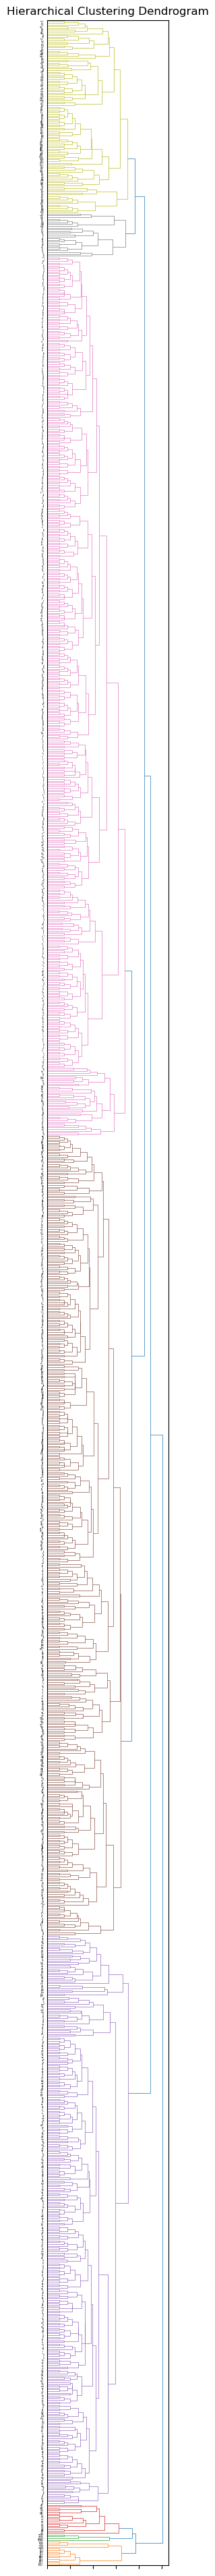

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

print('Clustering phones by phonetic similarity....')

# Custom transformation (a combination of linear and logarithmic scaling)
custom_transformed_distances = distance_matrix ** 0.45

# Perform hierarchical clustering
linked = linkage(squareform(custom_transformed_distances), method='complete', metric='euclidian' ) # method='complete' metric='euclidean'

print('Generating dendrogram of phonetic similarity....')
# Create a dendrogram to visualize the clustering
height = int(n/30)+1
plt.figure(figsize=(2, height))
plt.rcParams['lines.linewidth'] = 0.5
dendrogram_object = dendrogram(linked, orientation='right', labels=array_of_strings, leaf_font_size=2)
adjusted_labels_y = adjust_y_padding_by_index([label for label in dendrogram_object['ivl']], padding_levels)
dendrogram_object['ivl'] = adjusted_labels_y
#dendrogram_object = dendrogram(linked, orientation='right', labels=adjusted_labels_y, leaf_font_size=2)
plt.title('Hierarchical Clustering Dendrogram')
plt.tick_params(axis='both', which='both', pad=0)
plt.subplots_adjust(left=0)

if exportFiles:
    fn = folder + '\Dendrogram.png'
    plt.savefig(fn, dpi=1000, bbox_inches='tight')
    print('Dendrogram saved in {folder} folder.')
    
    
print('Displaying Dendrogram...')
plt.show()



In [13]:
print('Reordering the Matrix to match the dendrogram...')
# Reorder the distance matrix based on the clustering
order = dendrogram(linked, no_plot=True)['leaves']
distance_df = distance_df.iloc[order, order]
print('Done.')

Reordering the Matrix to match the dendrogram...
Done.


Creating the new matrix...
Rendering the matrix image...
SortedHeatmap saved in {folder} folder.
Displaying the Matrix image...


<Figure size 49000x49000 with 0 Axes>

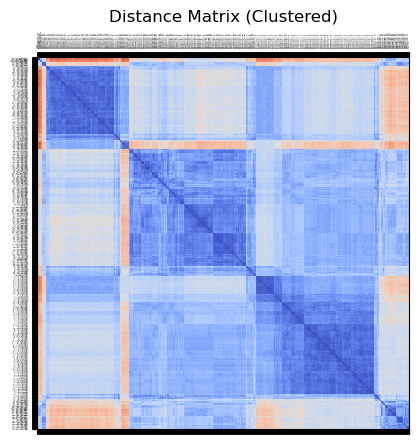

In [14]:
print('Creating the new matrix...')

# Create a heatmap for the reordered distance matrix
size = int(n/30) + 1
plt.figure(figsize=(size, size), dpi=1000)
#figure, ax = plt.subplots(figsize=(40, 40)) 

cax = plt.matshow(distance_df, cmap='coolwarm', aspect='auto')
# plt.colorbar(cax)

# Customize the plot (optional)
plt.xticks(np.arange(n), distance_df.columns, rotation=90)
plt.yticks(np.arange(n), distance_df.index)
#plt.rcParams['xtick.labelsize'] = 1  # Adjust the font size for x-axis tick labels
#plt.rcParams['ytick.labelsize'] = 1

# Offset the y-tick labels
y_tick_labels = plt.gca().get_yticklabels()
adjusted_labels_y = adjust_y_padding_by_index([label.get_text() for label in y_tick_labels], padding_levels)
plt.gca().set_yticklabels(adjusted_labels_y)

# Offset the x-tick labels
x_tick_labels = plt.gca().get_xticklabels()
adjusted_labels_x = adjust_x_padding_by_index([label.get_text() for label in x_tick_labels], padding_levels)
plt.gca().set_xticklabels(adjusted_labels_x)

plt.title('Distance Matrix (Clustered)')

if exportFiles:
    print('Rendering the matrix image...')
    fn = folder + '\SortedHeatmap.png'
    plt.savefig(fn, dpi=1000, bbox_inches='tight')
    print('SortedHeatmap saved in {folder} folder.')
# Display the plot
print('Displaying the Matrix image...')
plt.show()

In [15]:
column_labels = distance_df.columns.values
print('The final set of phones is:')
print(', '.join(column_labels))
        
    
if exportFiles:   
    with open(folder + '\phones.txt', 'w', encoding='utf-8') as file:
        for column in column_labels:
            file.write(column + '\n')

    with open(folder + '\groups.txt', 'w', encoding='utf-8') as file:    
        for column in column_labels:
                file.write(', '.join(groups[column]) + '\n')

    with open(folder + '\stats.txt', 'w', encoding='utf-8') as file:
            file.write('Found ' + str(len(equivalent_groups)) + ' groups with feature equivalence.')


    distance_df.to_csv(folder + '\distance.csv', index=True, encoding='utf-8')        

    with open(folder + '\junk.txt', 'w', encoding='utf-8') as file:
        for phone in junk:
            file.write(phone + '\n')

The final set of phones is:
kʘkxʼ, ɡʘkxʼ, kǂkxʼ, ɡǂkxʼ, kǁkxʼ, ɡǁkxʼ, kǀkxʼ, kǃkxʼ, ɡǀkxʼ, ɡǃkxʼ, ŋɡmb, ɴɢǁqʰ, ɴɢǀqʰ, ɴɢǃqʰ, ŋmkpɾ, ŋmɡbʷ, ŋmkp, ŋmɡb, ntʃɾ, kpr, ɡbr, ɳɖɽ, ɳɖr, ɳʈr, ndl, nsɾ, nzɾ, ndr, ntɾ, mbɾ, mpɾ, ɱfɾ, ɱvɾ, nɡɾ, ŋkɾ, ʔo, ʔɒ, ʔy, ʔæ, ʔe, ʔi, ja, jɪ, ɰɨ, jə, ɰə, wa, wə, wʊ, uɑ, uɑ˞, ua, ya, uaː, yaː, uːi, uːa, uːe, uø, uœ, ui, uɪ, ue, uɛ, uɐ, uɘ, uːə, uːʌ, yːə, ʉə, yə, yɜ, ʊɔ, uʊ, uo, uɔ, uoː, uɔː, yo, ʉɞ, yu, ʉu, uu, uy, yœː, ʉœ, yø, yœ, ye, yɛ, yi, ʉi, eu, ɛu, ɤu, ɐu, əu, ʊu, ɔuː, ou, ɔu, øu, œu, ɒu, oːu, œyː, ɔy, ɔyː, ɔːʉ, øːy, øy, œy, ɒːi, ɔːi, eːi, ɛːi, aːi, aːɪ, iɨ, ii, iɪ, ɪi, ɪɪ, ʏi, ɯɪ, ɨi, ɯi, əiː, ɛiː, eɪ, ɛɪ, ei, ɛi, œi, øi, øɪ, ʌɯ, əɨ, əɯ, ɤi, ɐɪ, əɪ, ɐi, ɘi, aiː, aɪː, aɨ, aɯ, ae, aɛ, ai, aɪ, ɑe, ɜe, ɤe, ɑːi, ɑi, ɑɪ, ɔaː, oa, ɔa, ʊe, ʊɛ, ʊi, ʊɪ, oɛ, ɔɛ, oe, ɔe, oi, oɪ, ɔi, ɔɪ, uɨ, ʊɨ, oaˤ, oiˤ, ɒə, ɒɯ, ɯo, əo, ɜo, ooː, ɔo, oo, oɔ, œʏ, ɔʏ, ɞʏ, oɤ˞, ɐʊ, əʊ, oʊ, ɔʊ, aeˤ, aoˤ, ao, aɔ, aə, æʌ, eo, eɔ, ɛo, ɛɔ, iʊ, ɪɔ, io, iɔ, aʊ, æːʊ, ɛɯ, eʊ, ɛʊ, ɑuː, ɑu, ɑy, ɑ